In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tables
import h5py
from scipy.spatial.distance import pdist, squareform
import os

/opt/gentoo/usr/lib64/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


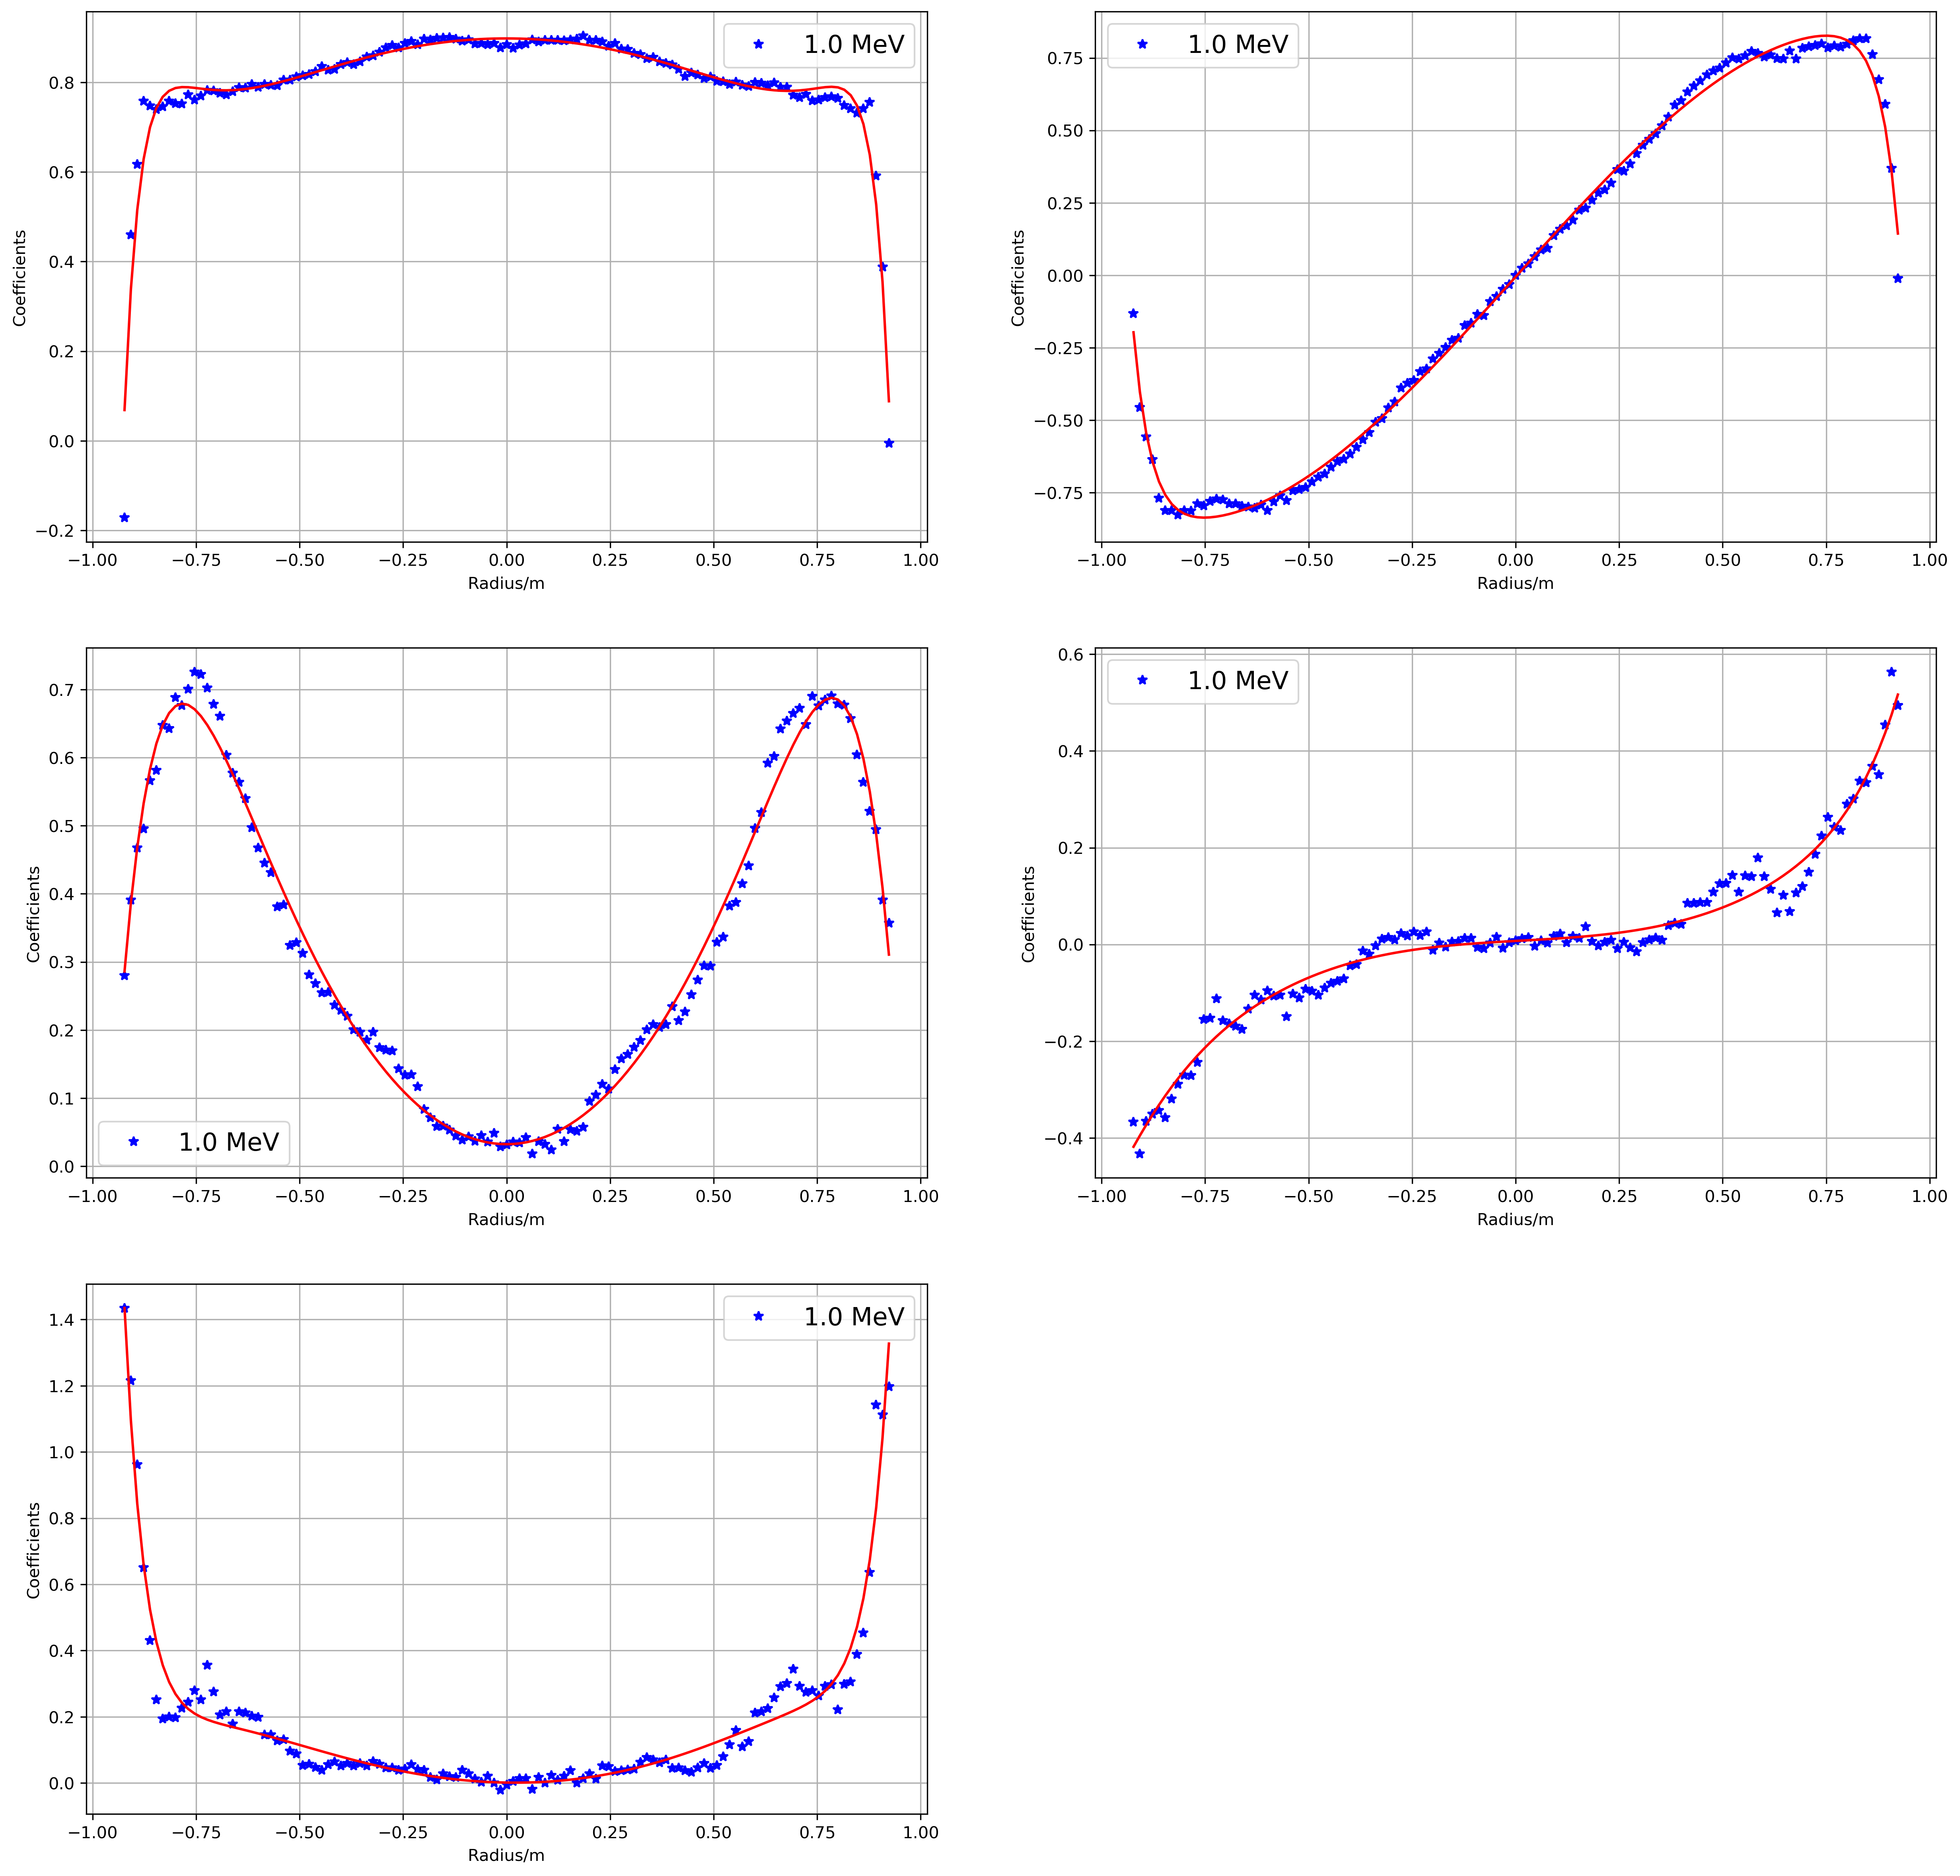

In [52]:
import os
import tables

poly_model = make_pipeline(PolynomialFeatures(32), Lasso(alpha=0.0001))

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

def findfile(radius):
    filename = '../coeff_pe_1t/file_' + radius + '.h5'
    #print(filename)
    h = tables.open_file(filename,'r')
    coeff = np.array(h.root.coeff)[:]
    expect = np.array(h.root.mean)[:]
    predict = np.array(h.root.expect)[:]
    h.close()
    return coeff, expect, predict
coeff = [];
expect = [];
predict = [];

radius = np.arange(0.6001, -0.60, -0.01)
for i in radius:
    file_str = '%+.2f' % i
    a1,a2,a3 = findfile(file_str)
    coeff.append(a1)
    expect.append(a2)
    predict.append(a3)
pe_coeff = np.array(coeff)

plt.figure(figsize=(20,20),dpi=300)
for i in np.arange(5):
    plt.subplot(3,2,i+1)
    xfit = radius/0.65
    plt.plot(xfit, pe_coeff[:,i],'b*')
    plt.xlabel('Radius/m')
    plt.ylabel('Coefficients')

    plt.legend(['1.0 MeV'], fontsize=15)
    plt.grid()
    
    poly_model.fit(xfit[:, np.newaxis], pe_coeff[:,i])
    yfit = poly_model.predict(xfit[:, np.newaxis])
    plt.plot(xfit, yfit, c='red')
plt.show()

/opt/gentoo/usr/lib64/python3.6/site-packages/sklearn/pipeline.py:267: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/opt/gentoo/usr/lib64/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/gentoo/usr/lib64/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


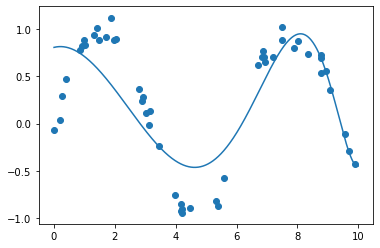

In [42]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

poly_model = make_pipeline(PolynomialFeatures(16), Lasso(alpha=0))

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) +  0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [43]:
np.newaxis